<a target="_blank" href="https://colab.research.google.com/github/Rifath-Mahmud/CVPR/blob/main/mnist-classification-knn.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# MNIST digits classification
![MNIST digits classification](http://raw.githubusercontent.com/debajyotikarmaker/cvpr_4234/6cc0a8a3350f1e4af2c4bb6ef8fb63dd6ed43aa8/resources/images/M_2/MnistExamples.png)

In [1]:
import torch
from torchvision import datasets
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Loading and Reducing the MNIST Dataset for faster experiment
This code loads the MNIST handwritten digits dataset using torchvision.datasets and then reduces the dataset size to make experiments faster and more memory-efficient.

**The total number of samples in the original training and test sets is printed to confirm successful loading.**
* MNIST normally contains **60,000** training images and **10,000** test images.

**Only a subset of the data is selected for reducing computation time:**
* The first 10,000 training images and labels
* The first 500 test images and labels



In [2]:
data_folder = '~/data/MNIST' # This can be any directory you
train = datasets.MNIST(root=data_folder, train=True, download=True)
test = datasets.MNIST(root=data_folder, train=False, download=True)
print(f'Original Training Samples : {len(train.data)}')
print(f'Original Test Samples : {len(test.data)}')

print("Only a subset of the data is selected for reducing computation time:")
x_train = train.data[:10000]
y_train = train.targets[:10000]
x_test = test.data[:500]
y_test = test.targets[:500]
print(f'Reduced Training Samples To: {len(x_train)}')
print(f'Reduced Test Samples : {len(x_test)}')

100%|██████████| 9.91M/9.91M [00:01<00:00, 6.01MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 161kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.49MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.80MB/s]

Original Training Samples : 60000
Original Test Samples : 10000
Only a subset of the data is selected for reducing computation time:
Reduced Training Samples To: 10000
Reduced Test Samples : 500


# Reshaping MNIST Images for Model Input (e.g. KNN)
**Shape of Training images and labels are first displayed to confirm the original data dimensions.**
* Each MNIST image initially has a **2D shape (28 × 28).**
* Original Training data shape:  **(number of samples, 28, 28)**
* Original Test data shape:  **(number of samples, 28, 28)**

**Images are then reshaped into 1D vectors of size 784 to make them suitable for vector-based models.**
* Training data shape: **(number of samples, 784)**
* Test data shape: **(number of samples, 784)**

In [3]:
print(f'Train images: {x_train.shape}')
print(f'Test images: {x_test.shape}')

print("========= Coverting Each Image to Singel Dimension or Vector ========= ")
x_train = x_train.view(x_train.size(0), -1).float()
x_test  = x_test.view(x_test.size(0), -1).float()

print(f'Train images: {x_train.shape}')
print(f'Test images: {x_test.shape}')

Train images: torch.Size([10000, 28, 28])
Test images: torch.Size([500, 28, 28])
========= Coverting Each Image to Singel Dimension or Vector ========= 
Train images: torch.Size([10000, 784])
Test images: torch.Size([500, 784])


# K-Nearest Neighbors (KNN) Prediction and Accuracy

* For each test sample, the Manhattan distance to all training samples is computed.
* The k nearest neighbors (smallest distances) are selected.
* The predicted label is determined using a majority vote among the neighbors’ labels.
* Predictions are stored and converted into a tensor for evaluation.
* Final accuracy is computed as the percentage of correctly classified test samples.

In [4]:
class KNN:
  def __init__(self, k=3):
    self.k = k

  def train(self, x_train, y_train):
    self.x_train = x_train
    self.y_train = y_train

  def predict(self, x_test):
    if x_test.dim() == 1:
      x_test = x_test.unsqueeze(0)

    preds = []
    for x in x_test:
        distances = torch.sum(torch.abs(self.x_train-x),dim=1)
        knn_idx = distances.topk(self.k,largest=False).indices
        knn_labels = self.y_train[knn_idx]
        pred = torch.mode(knn_labels).values.item()
        preds.append(pred)
    preds = torch.tensor(preds)
    return preds

In [5]:
model = KNN(3)
model.train(x_train,y_train)
results = model.predict(x_test)
accuracy = (y_test == results).float().mean().item()*100;
print(f'Using Training Samples = {x_train.size(0)} and Testing Samples = {x_test.size(0)}')
print(f'Accuracy = {accuracy:.2f}%')

Using Training Samples = 10000 and Testing Samples = 500
Accuracy = 91.20%


# Display a Random MNIST Test Image with KNN Prediction
* Selects a random test image from the dataset.
* Uses the KNN classifier to predict the label of this image.
* Plots the image with predicted label as the title.

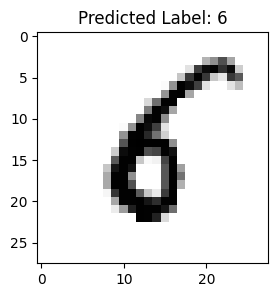

In [6]:
rand_image = x_test[np.random.randint(0, len(x_test))]
result = model.predict(rand_image)
plt.figure(figsize=(3, 3))
plt.title(f'Predicted Label: {result.item()}')
plt.imshow(rand_image.view(28, 28), cmap='gray_r')
plt.show()